<center><b><font size=6>Lab-5 Dimensionality Reduction<b><center>

### Objective: Applying following techniques
1. **Scikit-learn (sklearn)** is one of the most famous Python libraries designed for machine learning. You can use it to do literally everything for ML, such as classification and clustering. In this tutorial, besides the data scaling method, we focus on dimensionality reduction, which reduce the number of random variables (features) to consider. Useful link: <a href="https://scikit-learn.org/stable/">official documentation</a>, <a href="https://scikit-learn.org/stable/modules/decomposition.html#decompositions">dimensionality reduction in sklearn</a>.
2. **Correlation Analysis** aims to investigate the correlations among different numerical properties. Machine Learning algorithms are sensitive to data, and if two features are highly correlated to each other, either of them can be considered redundant (repeated information), e.g., age and date of birth, if a ML model is developed based on both features, it will learn the same thing out of them, which is not only useless but also complicates the model, potentially increasing the time consumption.
3. **Principal Component Analysis (PCA)** is used to project the original dataset into a new feature space (the components). Simply put, PCA tries to reduce the number of variables, while preserving the characteristics and differences as much as possible. Useful link: <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA">PCA in sklearn</a>.

In [1]:
# import needed python libraries
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

### 1. Tutorial
Here we use IRIS dataset as an example to show how you perform data scaling and PCA.

In [2]:
# load dataset

from sklearn import datasets
iris_data = datasets.load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris_original = pd.DataFrame(iris_data.data, columns = columns)
df_iris_original['type'] = 'setosa'
df_iris_original.loc[50:99, 'type'] = 'versicolor'
df_iris_original.loc[100:149, 'type'] = 'virginica'

df_iris_original

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1.1 Data scaling
Before performing Machine Learning tasks, data must be scaled to belong to similar numerical space (range). Several scalers are available, e.g., StandardScaler standardizes features by removing the mean, scaling the data to unit variance (`StandardScaler` from sklean).

In [3]:
# make a copy of the original dataset
df_iris_scaled = df_iris_original.copy()

# define the scaler
scaler = StandardScaler()

# for each column in the dataset, fit and transform the data
for col in columns:
    
    # fit the scaler on the data 
    scaler.fit(df_iris_scaled[col].values.reshape(-1, 1))

    # transform the data to a column matrix [[], []] ecc
    # the -1 is like a placeholder for the number of rows in the dataset
    # the 1 is the number of desired columns
    df_iris_scaled[col] = scaler.transform(df_iris_scaled[col].values.reshape(-1, 1))

# OR you can do it in an easy way
# df_iris_scaled[columns] = scaler.fit_transform(df_iris_scaled[columns])
df_iris_scaled

,sepal_length,sepal_width,petal_length,petal_width,type
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


### 1.2 Correlation analysis
In order to analyze the correlation, we need to compute the correlation between each pair of features, which can be done using the pandas function ``.corr()`` (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr">documentation</a>). It calculate the Pearson correlation coefficient (<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Wiki</a>) between two numerical features, which is a value between -1 and 1. Normally, we take the absolute value, and the closer to 1 the higher the correlation.
$$ r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}} $$
<!-- $$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}} $$ -->
The result of correlation analysis can be displayed in a heatmap (<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a>), which is a symmetric matrix, indicating the correlation coefficient between each pair of features (even a feature with itself).

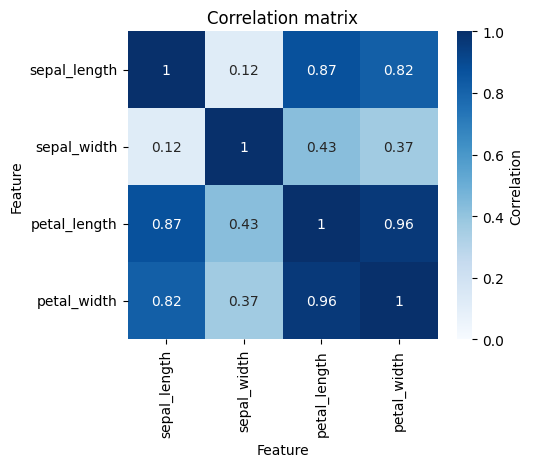

In [4]:
# Compute the correlation matrix
correlation_matrix = df_iris_scaled.drop(columns=['type']).corr().abs()
# returns exactly the same result as the below graph

# Compute the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

### 1.3 Principal Component Analysis (PCA)

In [5]:
# PCA must be initialized with a random state to initialize the space
pca = PCA(random_state=15)

# .fit() is used to compute the new dimensions with number of features from 1 to the number of original features
pca.fit(df_iris_scaled[columns])

PCA(random_state=15)

### 1.4 PCA visualization
HINT: Use a number components where you meet the elbow point. i.e., if increasing the number of components does not increase much the cumulative explained variance. In the title, you can specify the percentage at the number of component you choose.

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\3761990237.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'3 PCs explain {round(perc_cumul_exp_var[2], 2)}% of $\sigma^2$')


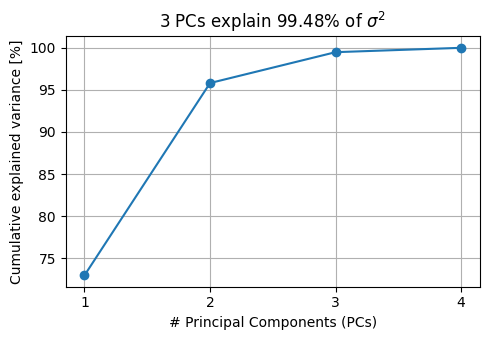

In [6]:
# describe how much of the dataset variability is indicated by a given amount of features
explained_variance = pca.explained_variance_ratio_

# evaluate the total dataset variability while increasing the variables
cumul_exp_var = np.cumsum(explained_variance)

# percentage value to better understand the best number of components
perc_cumul_exp_var = cumul_exp_var * 100

# make the plot of cumulative explained variance wrt number of components
plt.figure(figsize=(5, 3.5))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(4)], [i for i in range(1,5)])
plt.grid()
plt.title(f'3 PCs explain {round(perc_cumul_exp_var[2], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

### 1.5 PCA transformation

In [7]:
# initialize the PCA with the best number of components, in this case, it's 3
pca = PCA(n_components=3, random_state=15)

# fit the data to new space
pca.fit(df_iris_scaled[columns])

# transform the original data into PCA components
pca_result = pca.transform(df_iris_scaled[columns])

# create the new dataset
df_iris_pca = pd.DataFrame(pca_result, columns=['component_1', 'component_2', 'component_3'])
df_iris_pca['type'] = df_iris_original['type']
df_iris_pca

,component_1,component_2,component_3,type
0,-2.264703,0.480027,0.127706,setosa
1,-2.080961,-0.674134,0.234609,setosa
2,-2.364229,-0.341908,-0.044201,setosa
3,-2.299384,-0.597395,-0.091290,setosa
4,-2.389842,0.646835,-0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,-0.256274,virginica
146,1.564580,-0.896687,0.026371,virginica
147,1.521170,0.269069,-0.180178,virginica
148,1.372788,1.011254,-0.933395,virginica


### 1.6 Loading score
The loading score can be used to extract the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed. It can describe how strongly a component describes the original features and identify potentially redundant features in for a given component. Note that the score is computed as ``pca.components_.T * np.sqrt(pca.explained_variance_)``.

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\1973356067.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'3 PCs explain {round(perc_cumul_exp_var[2], 2)}% of $\sigma^2$')


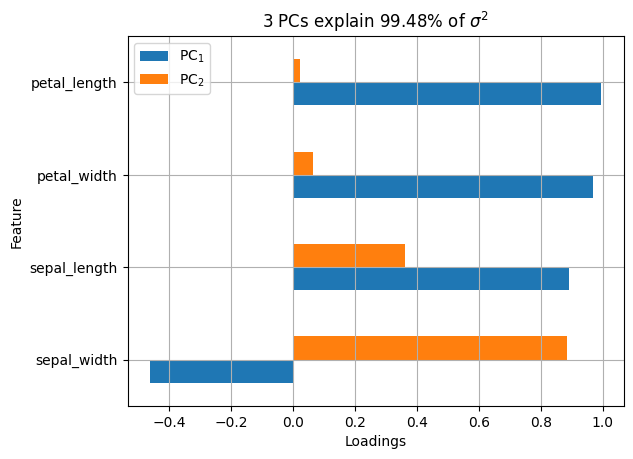

In [8]:
# Compute the loading scores and create the dataframe
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, 4)],
    index = columns
)

plt.figure()
loadings = loadings[['PC1', 'PC2']]
loadings.sort_values(['PC1', 'PC2']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'3 PCs explain {round(perc_cumul_exp_var[2], 2)}% of $\sigma^2$')
plt.show()

### 2. Exercise - Darknet Dataset
In this lab, we still focus on Darknet dataset (refer to the introduction of previous lab). Specifically, you will develop the ML pipeline to extract features from the dataset, understand the features, and perform a Principal Component Analysis (PCA).

In the ``darknet_traces.csv`` file, you will find logs of darknet traffic. Each record contains the following features:
- ts: timestamp of the received packet
- src_ip: IP address from which the packet was sent
- src_port: source port from which the packet was sent
- dst_ip: Darknet IP address that the packet reached
- dst_port: darknet port the packet reached
- proto: protocol used
- pck_len: Length of the packet in bytes
- ttl: packet time to live

### 2.1 Dataset management

In [9]:
# Load the dataset
df = pd.read_csv('darknet_traces.csv')

# Add one column named 'packets', containing only 1 packet for each row
df['packets'] = 1

1. The provided features are not suitable for our task. We need to treat it as the source data to generate a new dataset with new features calculated from available features. Specifically, you need to generate a dataset reporting the information of source IP address, and for each individual source IP address (a row), you need to get the following 16 features (Fill NaN values with 0s):
    - Number of packets
    - Number of different ports contacted
    - Number of distinct used protocols
    - Number of distinct contacted `dst_ip`
    - Min, Max, Avg, Std of the `dst_port`, treated as decimal number
    - Min, Max, Avg, Std of the `pck_len`
    - Min, Max, Avg, Std of the `ttl`

In [10]:
columns = [
    'n_packets', "n_ports", "n_proto", "n_dst_ip",
    "min_dst_port", "max_dst_port", "avg_dst_port", "std_dst_port",
    "min_pck_len", "max_pck_len", "avg_pck_len", "std_pck_len",
    "min_ttl", "max_ttl", "avg_ttl", "std_ttl",
]

new_dataset = df.groupby('src_ip').agg({
    "packets": "sum",
    "dst_port": "nunique",
    "proto": "nunique",
    "dst_ip": "nunique",
}).rename(columns={
    "packets": "n_packets",
    "dst_port": "n_ports",
    "proto": "n_proto",
    "dst_ip": "n_dst_ip",
})

agg_stats = df[['src_ip', 'dst_port', 'pck_len', 'ttl']].groupby('src_ip')[['dst_port', 'pck_len', 'ttl']].agg(['min', 'max', 'mean', 'std']).fillna(.0)
# columns are tuple (Feature, Statistic)
# print(agg_stats.columns)
agg_stats.columns = [f'{col}_{stat}' for col, stat in agg_stats.columns]

new_dataset = new_dataset.reset_index().merge(agg_stats.reset_index(), on='src_ip', how='inner')
new_dataset.set_index('src_ip', inplace=True)
# new_dataset.sort_values("n_packets", ascending=False, inplace=True)

columns = list(new_dataset.columns)
print(columns)
new_dataset

['n_packets', 'n_ports', 'n_proto', 'n_dst_ip', 'dst_port_min', 'dst_port_max', 'dst_port_mean', 'dst_port_std', 'pck_len_min', 'pck_len_max', 'pck_len_mean', 'pck_len_std', 'ttl_min', 'ttl_max', 'ttl_mean', 'ttl_std']


,n_packets,n_ports,n_proto,n_dst_ip,dst_port_min,dst_port_max,dst_port_mean,dst_port_std,pck_len_min,pck_len_max,pck_len_mean,pck_len_std,ttl_min,ttl_max,ttl_mean,ttl_std
src_ip,,,,,,,,,,,,,,,,
1.11.146.45,5,1,1,5,23,23,23.000000,0.000000,60,60,60.0,0.000000,35.0,35.0,35.000000,0.000000
1.123.162.134,1,1,1,1,5555,5555,5555.000000,0.000000,60,60,60.0,0.000000,35.0,35.0,35.000000,0.000000
1.15.180.236,3,2,1,2,23,2323,789.666667,1327.905619,60,60,60.0,0.000000,34.0,36.0,34.666667,1.154701
1.15.223.144,107,1,1,107,6379,6379,6379.000000,0.000000,74,74,74.0,0.000000,34.0,37.0,35.130841,0.952495
1.15.58.49,3,1,1,1,80,80,80.000000,0.000000,74,74,74.0,0.000000,35.0,35.0,35.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.49.113.248,1,1,1,1,8080,8080,8080.000000,0.000000,60,60,60.0,0.000000,233.0,233.0,233.000000,0.000000
99.61.83.139,1,1,1,1,22,22,22.000000,0.000000,60,60,60.0,0.000000,235.0,235.0,235.000000,0.000000
99.84.144.85,10,5,1,5,10542,47616,20188.000000,11745.961973,60,66,62.4,3.098387,33.0,223.0,147.000000,98.115578


2. Use a standard scalar to scale the entire dataset.

In [11]:
scaler = StandardScaler()
new_dataset_scaled = new_dataset.copy()
# scaler.fit(new_dataset_scaled[columns].values.reshape(-1, len(columns)))
# new_dataset_scaled[columns] = scaler.transform(new_dataset_scaled[columns].values.reshape(-1, len(columns)))
scaler.fit(new_dataset_scaled[columns])
new_dataset_scaled[columns] = scaler.transform(new_dataset_scaled[columns])
new_dataset_scaled

,n_packets,n_ports,n_proto,n_dst_ip,dst_port_min,dst_port_max,dst_port_mean,dst_port_std,pck_len_min,pck_len_max,pck_len_mean,pck_len_std,ttl_min,ttl_max,ttl_mean,ttl_std
src_ip,,,,,,,,,,,,,,,,
1.11.146.45,-0.029018,-0.127954,-0.152201,-0.122707,-0.398233,-0.525029,-0.487497,-0.333084,-0.259895,-0.264030,-0.280674,-0.124714,-0.908119,-0.920081,-0.913223,-0.098085
1.123.162.134,-0.035017,-0.127954,-0.152201,-0.243154,0.039292,-0.197258,-0.070013,-0.333084,-0.259895,-0.264030,-0.280674,-0.124714,-0.908119,-0.920081,-0.913223,-0.098085
1.15.180.236,-0.032017,-0.086151,-0.152201,-0.213042,-0.398233,-0.388754,-0.429639,-0.034710,-0.259895,-0.264030,-0.280674,-0.124714,-0.919361,-0.908893,-0.916973,0.093560
1.15.223.144,0.123946,-0.127954,-0.152201,2.948696,0.104462,-0.148436,-0.007829,-0.333084,0.257639,0.122303,0.228785,-0.124714,-0.919361,-0.897705,-0.911752,0.060000
1.15.58.49,-0.032017,-0.127954,-0.152201,-0.243154,-0.393725,-0.521652,-0.483195,-0.333084,0.257639,0.122303,0.228785,-0.124714,-0.908119,-0.920081,-0.913223,-0.098085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.49.113.248,-0.035017,-0.127954,-0.152201,-0.243154,0.238994,-0.047652,0.120541,-0.333084,-0.259895,-0.264030,-0.280674,-0.124714,1.317842,1.295154,1.314206,-0.098085
99.61.83.139,-0.035017,-0.127954,-0.152201,-0.243154,-0.398312,-0.525088,-0.487572,-0.333084,-0.259895,-0.264030,-0.280674,-0.124714,1.340326,1.317530,1.336705,-0.098085
99.84.144.85,-0.021520,0.039258,-0.152201,-0.122707,0.433713,2.294855,1.034296,2.306179,-0.259895,-0.098459,-0.193338,0.358666,-0.930603,1.183274,0.346737,16.186171


3. Create two plots, randomly selecting a subset of the dataset (you can randomly select 1000 indices):
    - The first shows the packets sent (x-axis) and the ports (y-axis) contacted.
    - The second shows the scaled version of the packets sent and contacted ports contacted.
    - Answering the following question:
        - Are these graphs similar, why?
        - If you re-run the script (different random selection), are they still similar?
        - What is the impact of standardization?

C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\711191587.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


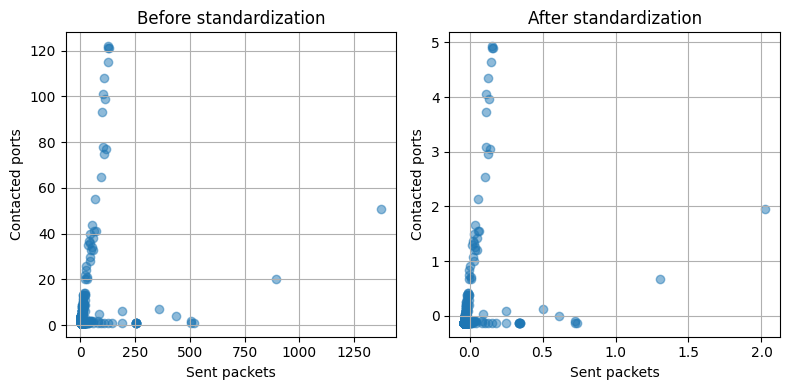

In [12]:
sample_index = new_dataset_scaled.sample(1000).index

n_rows, n_cols = 1, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

ax[0].scatter(new_dataset.loc[sample_index, 'n_packets'], new_dataset.loc[sample_index, 'n_ports'], alpha=.5)
ax[0].set_title("Before standardization")
ax[0].set_xlabel('Sent packets')
ax[0].set_ylabel('Contacted ports')
ax[0].grid()


ax[1].scatter(new_dataset_scaled.loc[sample_index, 'n_packets'], new_dataset_scaled.loc[sample_index, 'n_ports'], alpha=.5)
ax[1].set_title("After standardization")
ax[1].set_xlabel('Sent packets')
ax[1].set_ylabel('Contacted ports')
ax[1].grid()

fig.tight_layout()
fig.show()

### 2.2 Correlation analysis
- For the derived dataset with new features, analyze the correlation and output the heatmap with correlation coefficient, keeping only two digits. Answering the following questions:
    - How many features have highly correlated other features?
    - How many features can you remove?
    - When one feature is correlated to more than 1 other feature, how do you decide which to remove?

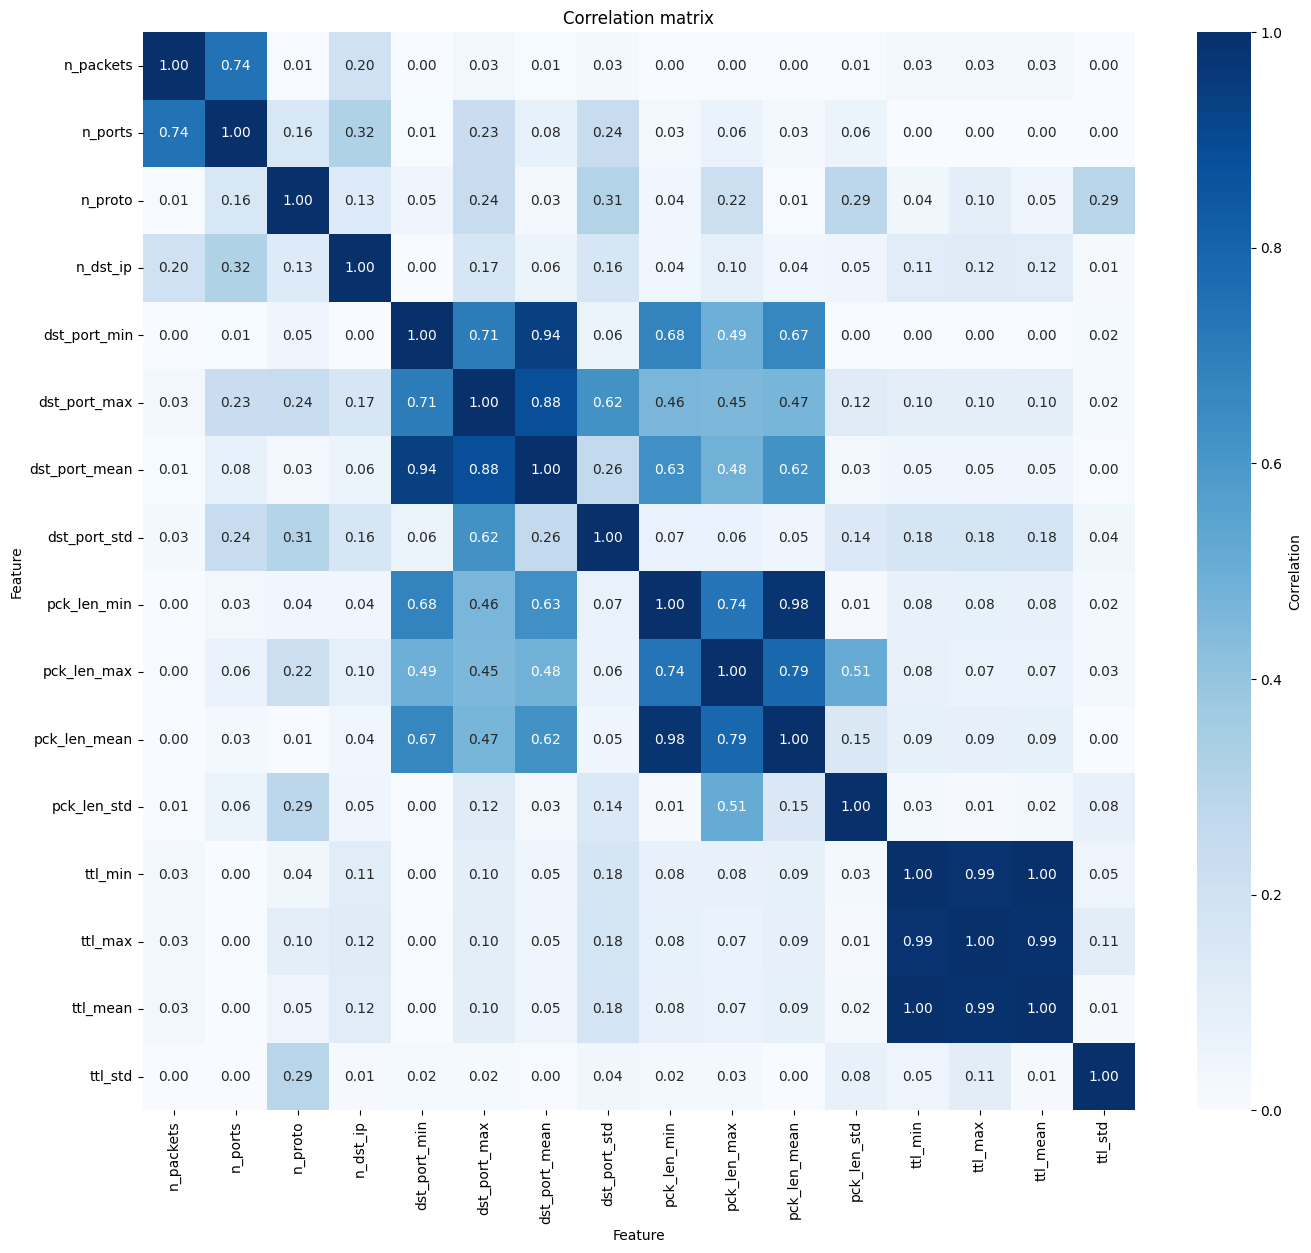

In [13]:
correlation_matrix = new_dataset_scaled.corr().abs()

plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

### 2.3 PCA
Let us begin by examining dimensionality reduction and how the number of components affects PCA’s ability to describe the dataset. Note that we do not eliminate correlated features for now, but focus on the original standardized dataset.

- Fit the PCA with the scaled dataset by setting ``random_state=15``. Examine the explained variance and plot the trend of the cumulative explained variance as you increase the number of components created. How many components would you choose? And why? 

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\2313693680.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')


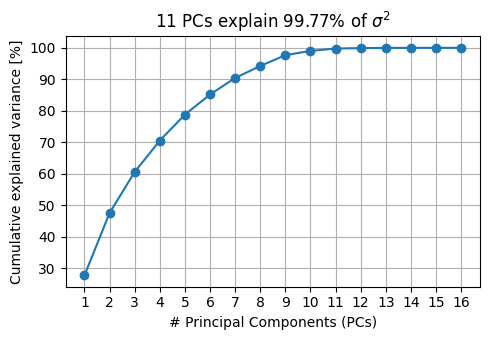

PC  1 explained variance:  27.77
PC  2 explained variance:  47.58
PC  3 explained variance:  60.60
PC  4 explained variance:  70.56
PC  5 explained variance:  78.81
PC  6 explained variance:  85.18
PC  7 explained variance:  90.42
PC  8 explained variance:  94.24
PC  9 explained variance:  97.67
PC 10 explained variance:  99.02
PC 11 explained variance:  99.77
PC 12 explained variance:  99.91
PC 13 explained variance:  99.97
PC 14 explained variance:  99.99
PC 15 explained variance: 100.00
PC 16 explained variance: 100.00


In [14]:
pca = PCA(random_state=15)
pca.fit(new_dataset_scaled[columns])

explained_variance = pca.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance)

perc_cumul_exp_var = cumul_exp_var * 100

n_features = 11

plt.figure(figsize=(5, 3.5))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(len(columns))], [i for i in range(1,len(columns)+1)])
plt.grid()
plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

for i in range(len(columns)):
    print(f'PC {i+1:2} explained variance: {round(perc_cumul_exp_var[i], 2):6.2f}')


- From now on, keep the first 10 components, initializing PCA and fitting as well as transforming the dataset again. What is the cumulative explained variance. Is it identical to the one given in the plot of cumulative explained variance, why?

In [15]:
# initialize the PCA with the best number of components
n_features = 10
pca = PCA(n_components=n_features, random_state=15)

# fit the data to new space
pca.fit(new_dataset_scaled[columns])

cumul_exp_var = np.cumsum(pca.explained_variance_ratio_) # Get the cumulative explained variance
perc_cumul_exp_var = cumul_exp_var*100 # Get the percentages
print(perc_cumul_exp_var[-1])

# transform the original data into PCA components
pca_result = pca.transform(new_dataset_scaled[columns])

# create the new dataset
new_dataset_pca = pd.DataFrame(pca_result)
new_dataset_pca

99.01893233885927


,0,1,2,3,4,5,6,7,8,9
0,-0.950768,-1.612503,0.243355,-0.023468,0.058950,-0.041929,0.096816,-0.043697,0.013747,-0.059766
1,-0.477397,-1.575949,0.165876,-0.096772,0.385978,0.032759,-0.089567,0.188310,0.235682,-0.055712
2,-0.843625,-1.531069,0.371037,0.102880,0.266219,0.050918,-0.003289,-0.051407,-0.196728,-0.061873
3,0.354291,-1.234357,1.047129,-0.511834,-0.360542,-0.020077,2.768311,0.718170,0.129358,-0.436281
4,-0.388678,-1.749571,0.066051,-0.004211,-0.301626,-0.043040,0.075573,-0.402120,-0.239076,-0.034132
...,...,...,...,...,...,...,...,...,...,...
11788,-0.290662,2.028867,-0.995916,-0.306053,-0.227438,0.106738,-0.366750,0.231843,0.340736,0.108954
11789,-0.991179,1.987449,-0.950152,-0.175801,-0.689294,0.008596,-0.250735,-0.149746,0.008523,0.126736
11790,1.704953,1.718378,2.812305,5.863331,1.244113,12.712976,-0.453645,4.814586,-6.333293,0.504061
11791,7.916774,-0.656212,-1.564410,-0.980703,0.471215,0.623197,-0.353613,0.354347,0.680461,-0.014375


- Consider only the first 2 principal components (PC1 and PC2) of the 10 selected. Compute the Loading score for each of the original features with respect to the selected components. Notice that you can calculate the score as follows: <br>``scores = pca.components_.T * np.sqrt(pca.explained_variance_)``<br>
Remember that the loading scores can be seen as the weights of the each original feature used to generate the PCs. Answering the following questions:
    - Which feature contributes the most to PC1? And for PC2?
    - What are the most redundant features accordingly to the selected components?

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\4244720738.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')


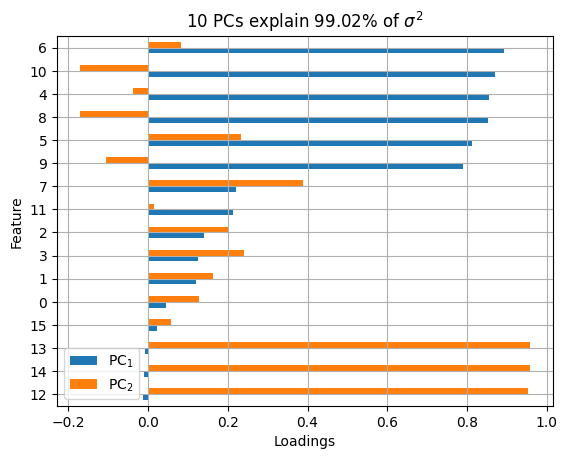

In [16]:
# Compute the loading scores and create the dataframe
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, n_features+1)],
)

plt.figure()
loadings = loadings[['PC1', 'PC2']]
loadings.sort_values(['PC1', 'PC2']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')
plt.show()

### 2.4 Repeat correlation analysis after performing PCA
For the transformed data with the optimal number of components, repeat the process of correlation heatmap. Answering the following questions:
- How many features (components) can you remove now, after doing the PCA?
- What phenomena can you observe? Why?

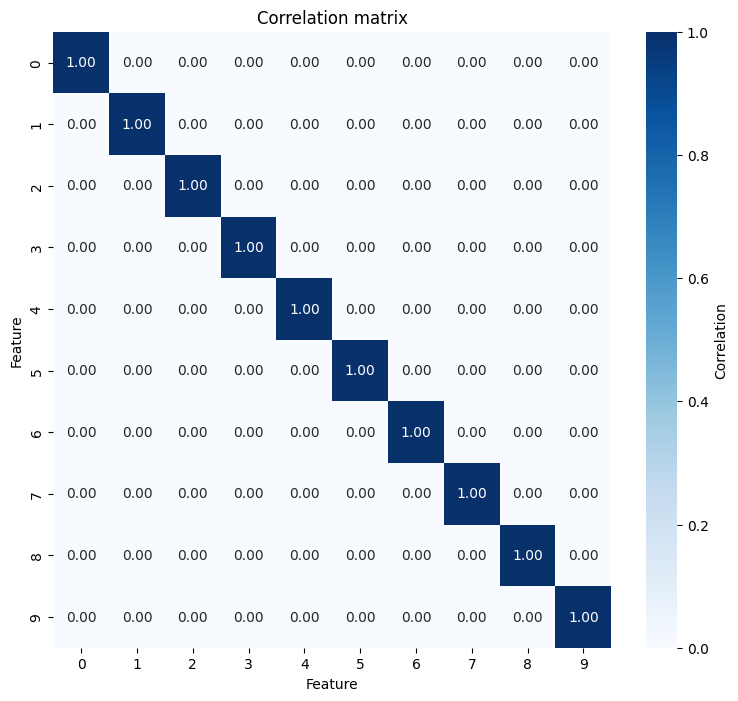

In [17]:
correlation_matrix = new_dataset_pca.corr().abs()

plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

### 2.5 Optional - PCA for features without standardization
Previously, we have done the whole procedure following the order from standardization to PCA, but what if we perform the PCA without standardizing the dataset? Herein, you repeat what you have done in 2.2, except that you refer to the original dataset with raw features instead of performing standardization.
1. Fit the PCA with the **original** features. Examine the explained variance and plot the trend of the cumulative explained variance as you have done before. Answering the following questions:
    - How many components would you choose now? Why?
    - Is the new result different from the previous result? Why?
2. Based on the selected number of components, re-fit the PCA on the original features.
3. Repeat the calculation and visualization of Loading score for the first 2 principal components (PC1 and PC2). Answering the following questions:
    - Which feature contributes the most to PC1? And for PC2?
    - Do you observe something abnormal? Why? How do you visualize them (tip: change the scale of reference frame)?

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\2593727337.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')


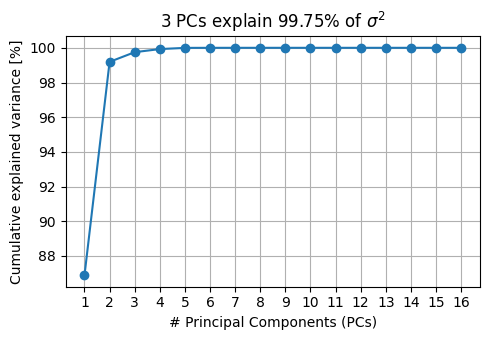

PC  1 explained variance:  86.88
PC  2 explained variance:  99.19
PC  3 explained variance:  99.75
PC  4 explained variance:  99.93
PC  5 explained variance: 100.00


In [18]:
pca = PCA(random_state=15)
pca.fit(new_dataset[columns])

explained_variance = pca.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance)

perc_cumul_exp_var = cumul_exp_var * 100

n_features = 3

plt.figure(figsize=(5, 3.5))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(len(columns))], [i for i in range(1,len(columns)+1)])
plt.grid()
plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

for i in range(len(columns)):
    val = round(perc_cumul_exp_var[i], 2)
    print(f'PC {i+1:2} explained variance: {val:6.2f}')
    if val >= 100: break

In [19]:
# initialize the PCA with the best number of components
pca = PCA(n_components=n_features, random_state=15)

# fit the data to new space
pca.fit(new_dataset[columns])

cumul_exp_var = np.cumsum(pca.explained_variance_ratio_) # Get the cumulative explained variance
perc_cumul_exp_var = cumul_exp_var*100 # Get the percentages
print(perc_cumul_exp_var[-1])

# transform the original data into PCA components
pca_result = pca.transform(new_dataset[columns])

# create the new dataset
pd.DataFrame(pca_result)

99.74820908076423


,0,1,2
0,-12100.829895,1166.395189,-93.916508
1,-2645.345086,2715.791423,-129.609094
2,-10018.240896,-594.658049,156.217538
3,-1236.837025,2946.250870,-136.297759
4,-12003.375140,1182.400809,-94.324609
...,...,...,...
11788,1670.621302,3422.156624,-143.864159
11789,-12102.391907,1165.292341,-91.781532
11790,37253.726785,-20625.080973,-3172.535564
11791,86568.426726,17334.319122,-466.595847


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dosis\AppData\Local\Temp\ipykernel_22032\1109734016.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')


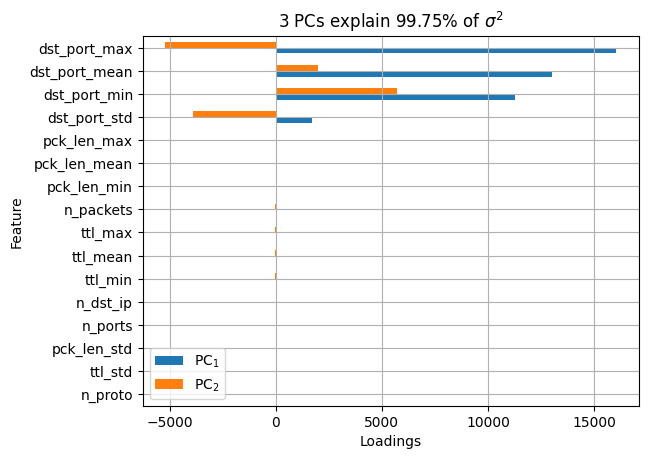

In [20]:
pca = PCA(n_components=n_features, random_state=15)
pca.fit(new_dataset[columns])

# Compute the loading scores and create the dataframe
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, n_features+1)],
    index = columns
)

plt.figure()
loadings = loadings[['PC1', 'PC2']]
loadings.sort_values(['PC1', 'PC2']).rename(columns={'PC1':'PC$_{1}$', 'PC2':'PC$_{2}$'}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'{n_features} PCs explain {round(perc_cumul_exp_var[n_features-1], 2)}% of $\sigma^2$')
plt.show()

### 2.6 Optional - Correlation analysis with Spearman's rank correlation coefficient
Previously, we have done the correlation analysis using Pearson correlation coefficient, and now, you can choose to explore the Spearman correlation coefficient, by specifying the ``method`` argument in ``corr()`` function. Note that you need to use the original standardized dataset instead of the one after performing PCA. Answering the following questions:
- What differences can you observe with respect to the previous correlation analysis?
- What similarities can you observe with respect to the previous correlation analysis?
- How many features can you remove now? Is it same as before?

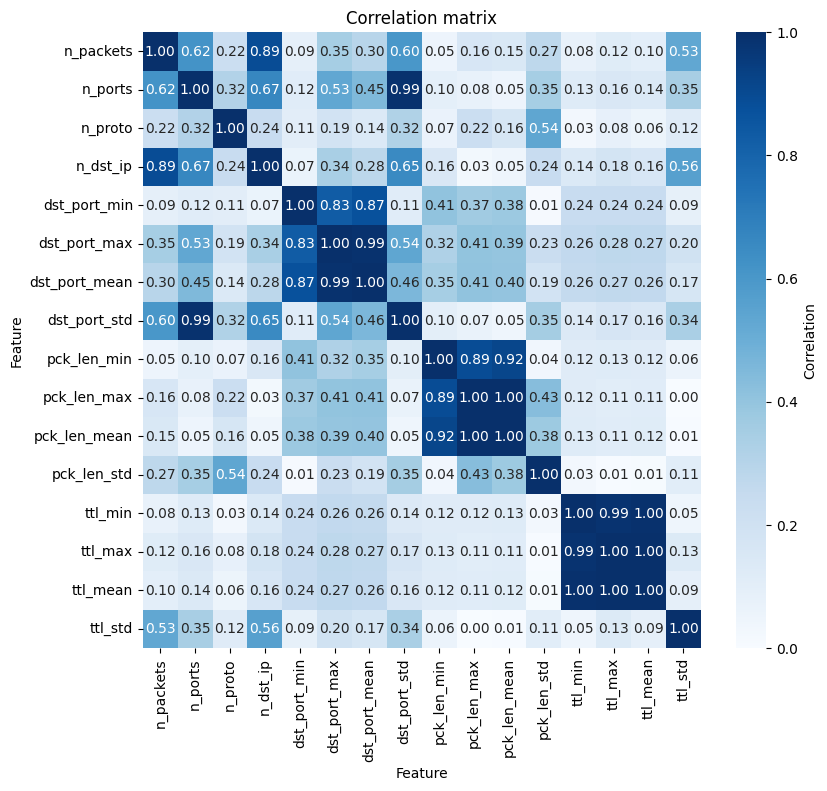

In [21]:
correlation_matrix = new_dataset.corr(method="spearman").abs()

plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()